In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
import copy
from PIL import Image
sys.path.insert(0, './lib_keras/')

from help_functions import *

In [3]:
class InhaRawDataPreprocessing():
    '''
    Inha hospital's OCT raw data preprocessing
    just select 5,6,7,8 oct scan data
    
    class init var
        root
            
        save_dir
        
        crop_points
            tuple lists (y1, y2, x1, x2)
            
        add_data
    
    
    why I use opencv instead of PIL
        opencv vs PIL : https://www.kaggle.com/vfdev5/pil-vs-opencv
    
    Functions
        load_raw_data
            load raw data from directory.
            
        size_standardization
        
        save_raw_data
    
    '''
    def __init__(self,root, save_dir,crop_points = (0,500,500,1260) ,add_mode = False, mode = None):
        '''
        get dir name list
        496
        
        '''
        self.root = root
        self.full_file_path = []
        self.each_file_name = []
        self.num_raw_data = 0
        self.raw_height = crop_points[1] - crop_points[0]
        self.raw_width = crop_points[3] - crop_points[2]

        # load 5~8 oct raw data
        self.load_raw_data(mode)
        self.raw_data_lists = np.zeros((self.num_raw_data,self.raw_height,self.raw_width,3))
        print(np.shape(self.raw_data_lists))
        #print(self.num_raw_data)
        #print(np.shape(self.raw_data_lists))
        # crop the data (crop points = x = 500 ~ 1260 / y = 0 ~ 500
        self.size_standardization(crop_points)
        #print(np.shape(self.raw_data_lists))
        #save the file
        print(np.shape(self.raw_data_lists))
        self.save_raw_data(save_dir,add_mode)
            
                        
    def load_raw_data(self,mode = 'sampling'):
        for root, dirs, files in os.walk(self.root):
            for file in files:
                if mode == 'sampling' and (file.startswith(".ipynb")==False and (file.endswith("5.jpg")==True or file.endswith("6.jpg")==True or 
                                                          file.endswith("7.jpg")==True or file.endswith("8.jpg")==True)):
                    self.full_file_path.append(root+'/'+file)
                    self.num_raw_data += 1
                    print(root+'/'+file)
                else:
                    #self.full_file_path.append(root+'/'+file)
                    #self.each_file_name.append(file)
                    #self.num_raw_data += 1
                    print('no sampling')
                    
    def size_standardization(self,crop_points):
        for idx,file_path in enumerate(self.full_file_path):
            temp_img = cv2.imread(file_path)
            #print('temp img : ',np.shape(temp_img))
            
            if np.shape(temp_img)[0] == 596:
                temp_img = temp_img[crop_points[0]:crop_points[1], crop_points[2] : crop_points[3]]
                self.raw_data_lists[idx] = temp_img
            else:
                temp_img = temp_img[:, crop_points[2] : crop_points[3]]
                self.raw_data_lists[idx, 0:496,:,:] = temp_img
    
    def save_raw_data(self,save_dir,add_mode = False):
        if os.path.isdir(save_dir) == False:
            os.mkdir(save_dir)
        else:
            print('already exist the folder in this path : {}'.format(save_dir))
            
            
        if add_mode == True:
            print('add mode')
            cnt = 0
            for count, filename in enumerate(sorted(os.listdir(save_dir)), start=0):
                if filename.startswith(".ipynb")==False:
                    cnt +=1
            
            print(cnt)
            for idx in range(len(self.raw_data_lists)):
                cv2.imwrite(save_dir + 'raw_data_' + str(cnt)+'_'+self.each_file_name[idx] +'.png', self.raw_data_lists[idx])
                cnt +=1
                if cnt == 800:
                    break
            
                
        else:
            for idx in range(len(self.raw_data_lists)):
                print(idx)
                print(self.full_file_path[idx])
                file_name = self.full_file_path[idx][-10:-4]
                print(file_name)
                if idx >=100:
                    #cv2.imwrite(save_dir + 'raw_data_' + str(idx)+'_'+self.each_file_name[idx]+'.png', self.raw_data_lists[idx])
                    cv2.imwrite(save_dir +file_name+'.png', self.raw_data_lists[idx])
                elif idx >= 10 and idx < 100:
                    #cv2.imwrite(save_dir + 'raw_data_' +'0'+ str(idx)+'_'+self.each_file_name[idx]+'.png', self.raw_data_lists[idx])
                    cv2.imwrite(save_dir +file_name+'.png', self.raw_data_lists[idx])

                else:
                    #cv2.imwrite(save_dir + 'raw_data_' + '00'+str(idx)+'_'+self.each_file_name[idx]+'.png', self.raw_data_lists[idx])
                    cv2.imwrite(save_dir +file_name+'.png', self.raw_data_lists[idx])

In [7]:
#file_num = '01'
ODOS = 'OS'
EYE_TYPE = 'normal'
#root_path = '/home/bono/Desktop/mellab_project/data/inhaHos_case_2020_11/Glaucoma_OCT/' + file_num +'/' + ODOS +'/'
#save_path = '/home/bono/Desktop/mellab_project/data/inhaHos_case_2020_11/Glaucoma_OCT/' + file_num +'/proc_'+ODOS+'/' 

for idx in range(0, 51):
    print(idx)
    if idx >= 10 and idx < 100:
        print(str(idx))
        root_path = '/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/' +'0'+ str(idx)+'/'
        save_path = '/home/bono/Desktop/mellab_project/data/set1_inhaHos/proc_data/' +'0'+str(idx)+'/' 
        processing_raw_data = InhaRawDataPreprocessing(root_path,save_path,add_mode= False, mode = 'sampling')
    elif idx <10:
        print('0'+str(idx))
        root_path =  '/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/'+ '00'+str(idx) +'/'
        save_path = '/home/bono/Desktop/mellab_project/data/set1_inhaHos/proc_data/'+ '00'+str(idx) +'/' 
        processing_raw_data = InhaRawDataPreprocessing(root_path,save_path,add_mode= False, mode = 'sampling')
    


0
00
(0, 500, 760, 3)
(0, 500, 760, 3)
1
01
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS2007.jpg
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS3006.jpg
no sampling
no sampling
no sampling
no sampling
no sampling
no sampling
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS4008.jpg
no sampling
no sampling
no sampling
no sampling
no sampling
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS4006.jpg
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS1005.jpg
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS3007.jpg
no sampling
no sampling
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS1007.jpg
no sampling
no sampling
no sampling
no sampling
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS2006.jpg
no sampling
no sampling
no sampling
/home/bono/Desktop/mellab_project/data/set1_inhaHos/raw_data/001//CHOIS2008.

In [22]:
file_path = '/home/bono/Desktop/mellab_project/data/inhaHos_case_2020_11/Glaucoma_OCT/01/OD/'
save_path = '/home/bono/Desktop/mellab_project/temp/'


cnt = 0
for count, filename in enumerate(sorted(os.listdir(file_path)), start=0):
    if filename.startswith(".ipynb")==False:
        
        print(filename)
        temp = cv2.imread(file_path + filename)
        cv2.imwrite(save_path+filename[:-4]+'_2_'+str(cnt)+'.png', temp )
        cnt +=1

raw_data_000.png
raw_data_001.png
raw_data_002.png
raw_data_003.png
raw_data_004.png
raw_data_005.png
raw_data_006.png
raw_data_007.png
raw_data_008.png
raw_data_009.png
raw_data_010.png
raw_data_014.png
raw_data_015.png
raw_data_016.png
raw_data_018.png
raw_data_019.png
raw_data_020.png
raw_data_021.png
raw_data_022.png
raw_data_023.png
raw_data_025.png
raw_data_027.png
raw_data_029.png
raw_data_032.png
raw_data_036.png
raw_data_037.png
raw_data_038.png
raw_data_039.png
raw_data_040.png
raw_data_041.png
raw_data_043.png
raw_data_046.png
raw_data_047.png
raw_data_051.png
raw_data_052.png
raw_data_054.png
raw_data_056.png
raw_data_058.png
raw_data_062.png
raw_data_063.png
raw_data_070.png
raw_data_071.png
raw_data_072.png
raw_data_074.png
raw_data_075.png
raw_data_076.png
raw_data_077.png
raw_data_079.png
raw_data_081.png
raw_data_085.png
raw_data_086.png
raw_data_089.png
raw_data_093.png
raw_data_100.png
raw_data_101.png
raw_data_104.png
raw_data_106.png
raw_data_109.png
raw_data_113.p

In [68]:
np.shape(processing_raw_data.raw_data_lists)

(656, 500, 760, 3)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
import copy
from PIL import Image

%matplotlib inline 

In [10]:
class labeler():
    def __init__(self, label_path):
        self.label_path = label_path
        
        
        self.label_path_stack = []
        self.num_label_file = 0
        
        for count, filename in enumerate(sorted(os.listdir(self.label_path)), start=0):
            if filename.startswith(".ipynb")==False:
                self.label_path_stack.append(self.label_path +filename)
                self.num_label_file = self.num_label_file +1
        print('number of label images : ', self.num_label_file)
    def __getitem__(self, idx):
        
        return cv2.imread(self.label_path_stack[idx])
        
    def plot_all_label_img(self, num_row, num_col):
        self.calc_hist_stack = np.zeros(shape=(self.num_label_file,3))
        self.color = ('b','g','r')
        
        fix, axs = plt.subplots(num_col, num_row)
        rows = 0; cols = 0
        for i in range(len(self.label_path_stack)):
            temp_imgs = cv2.imread(self.label_path_stack[i])
            print(np.shape(temp_imgs))
            for ch, colors in enumerate(self.color):
                hist_cal = cv2.calcHist([temp_imgs], [ch],None, [256], [0,256])
                axs[rows, cols].plot(hist_cal,color = colors)
            
                
            cols = cols+1
            if cols == num_col:
                cols = 0
                rows = rows+1
        
        plt.xlim([0,256])
        plt.show()
        
    def print_all_filename(self):
        print('label shape : ', np.shape(cv2.imread(self.label_path_stack[0])))
        for i in range(len(self.label_path_stack)):
            print(self.label_path_stack[i])
        


In [108]:
import numpy as np

number of label images :  46
(500, 760, 3)
(500, 760, 3)
255
(500, 760, 3)


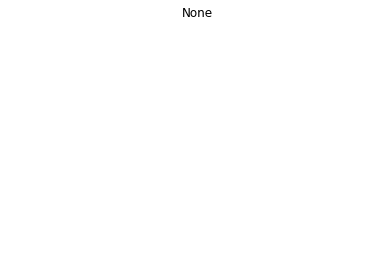

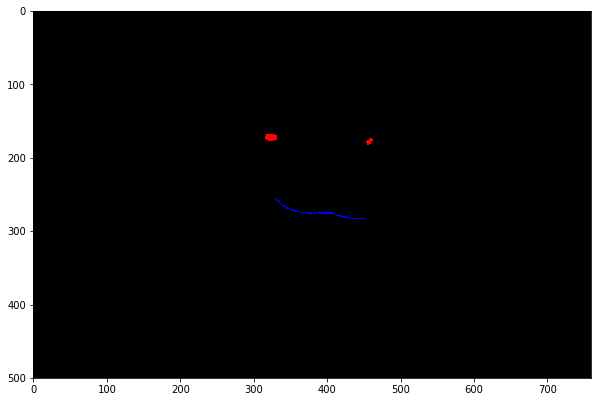

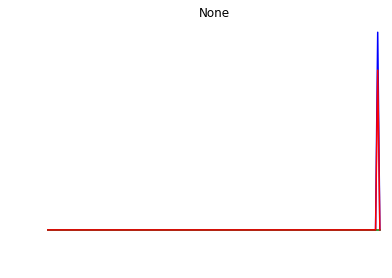

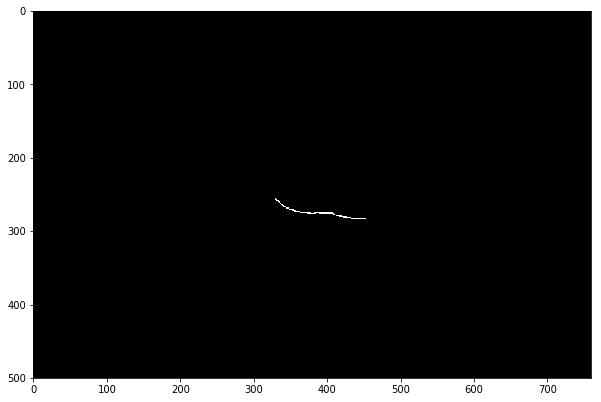

In [133]:
label_path = './data/inha_train/before_preprocess_label/'

labeler_img = labeler(label_path)
temp_img = np.empty((500,760,3))

print(np.shape(temp_img))

#abeler_img.plot_all_label_img(8,5)
#labeler_img.print_all_filename()
print(np.shape(labeler_img[0]))

i = 0
thr_val = 100

target_img = labeler_img[i]

thr_R_upper_idx = target_img[:,:,0] > thr_val
thr_B_upper_idx = target_img[:,:,2] > thr_val
thr_R_lower_idx = target_img[:,:,0] <= thr_val
thr_B_lower_idx = target_img[:,:,2] <= thr_val 

thr_G_idx = target_img[:,:,1] > 0

target_img[thr_R_upper_idx,0] = 255
target_img[thr_R_lower_idx,0] = 0

target_img[thr_B_upper_idx,2] = 255
target_img[thr_B_lower_idx,2] = 0

target_img[thr_G_idx,1] = 0


print(np.max(target_img[:,:,0]))
print(np.shape(target_img))

show_on_jupyter(target_img)

chans = cv2.split(target_img)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []


 
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [100, 256])
	features.extend(hist)
 
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([100, 256])
    
show_on_jupyter(target_img[:,:,0] == 255,'gray')

In [135]:
def thresolding_label_img(label_img, thr_val,file_name):
    '''
    consideration 'R', 'B'
    
    parameter
        label_img (int8, RGB)
        thr_val (int)
    
    
    '''
    target_img = label_img.copy()

    thr_R_upper_idx = target_img[:,:,0] > thr_val
    thr_B_upper_idx = target_img[:,:,2] > thr_val
    thr_R_lower_idx = target_img[:,:,0] <= thr_val
    thr_B_lower_idx = target_img[:,:,2] <= thr_val 
    
    thr_G_idx = target_img[:,:,1] > 0
    
    target_img[thr_R_upper_idx,0] = 255
    target_img[thr_R_lower_idx,0] = 0

    target_img[thr_B_upper_idx,2] = 255
    target_img[thr_B_lower_idx,2] = 0
    
    target_img[thr_G_idx,1] = 0
    
    cv2.imwrite(file_name,target_img)
    


In [136]:
save_path = './data/inha_train/label/'
label_path = './data/inha_train/before_preprocess_label/'

for count, filename in enumerate(sorted(os.listdir(label_path)), start=0):
    if filename.startswith(".ipynb")==False:
        thresolding_label_img(cv2.imread(label_path+filename), 100, save_path+filename)
        
        

In [137]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]



In [141]:
temp = to_categorical(cv2.imread('./data/inha_train/label/00.png'),3)

IndexError: index 255 is out of bounds for axis 0 with size 3

In [145]:
import torch